In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print("Customers dataset:")
print(customers.head())
print("\nProducts dataset:")
print(products.head())
print("\nTransactions dataset:")
print(transactions.head())

Customers dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [4]:
print("Customers info:")
print(customers.info())
print("\nProducts info:")
print(products.info())
print("\nTransactions info:")
print(transactions.info())

Customers info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null

In [5]:
# Cleaning and formatting date columns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [6]:
# Merging datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print("Merged data preview:")
print(merged_data.head())

Merged data preview:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetoot

Revenue by region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


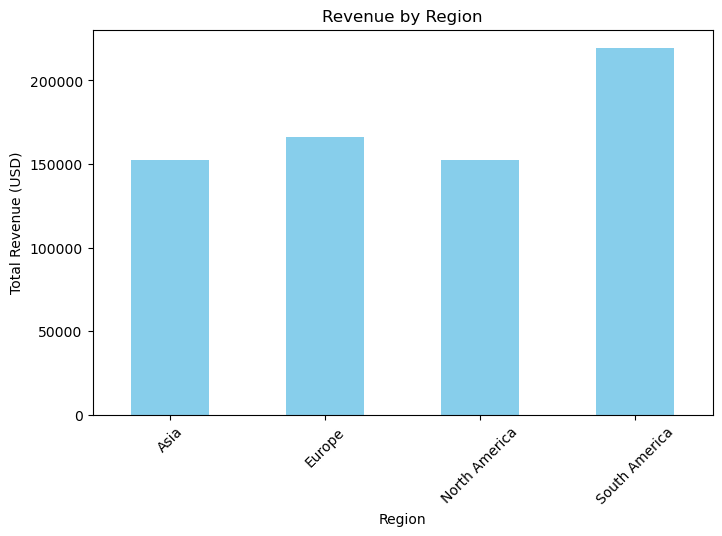

In [7]:
# Revenue by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum()
print("Revenue by region:")
print(region_revenue)

plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue by Region")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

Signup trends by month:
SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


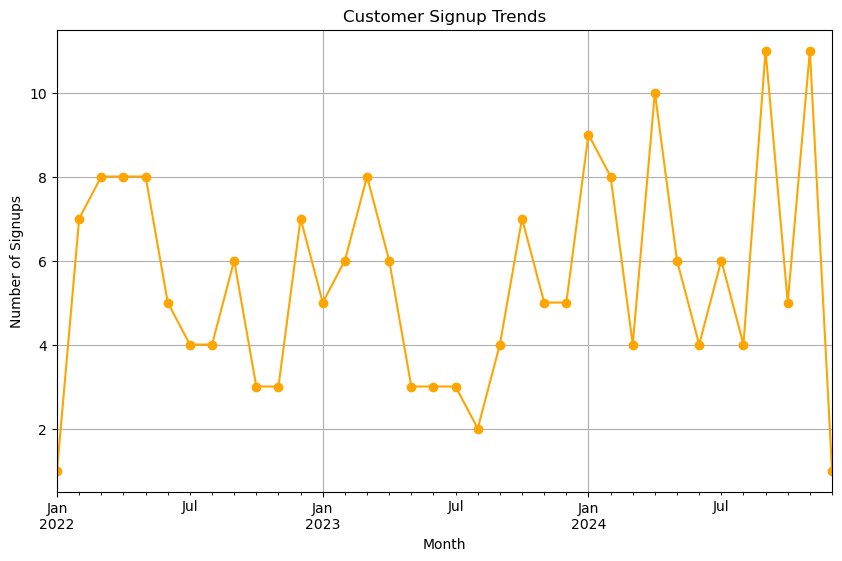

In [8]:
# Customer signup trends
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
print("Signup trends by month:")
print(signup_trends)

plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='orange')
plt.title("Customer Signup Trends")
plt.ylabel("Number of Signups")
plt.xlabel("Month")
plt.grid(True)
plt.show()

Sales by category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


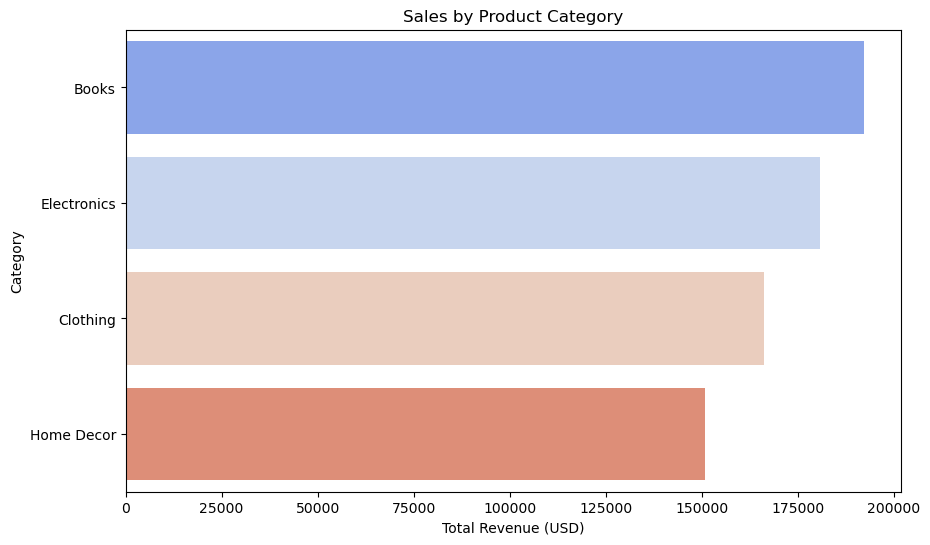

In [9]:
# Category-wise sales
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Sales by category:")
print(category_sales)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, hue=category_sales.index, palette='coolwarm', orient='h', legend=False)
plt.title("Sales by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.show()

Top 10 best-selling products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


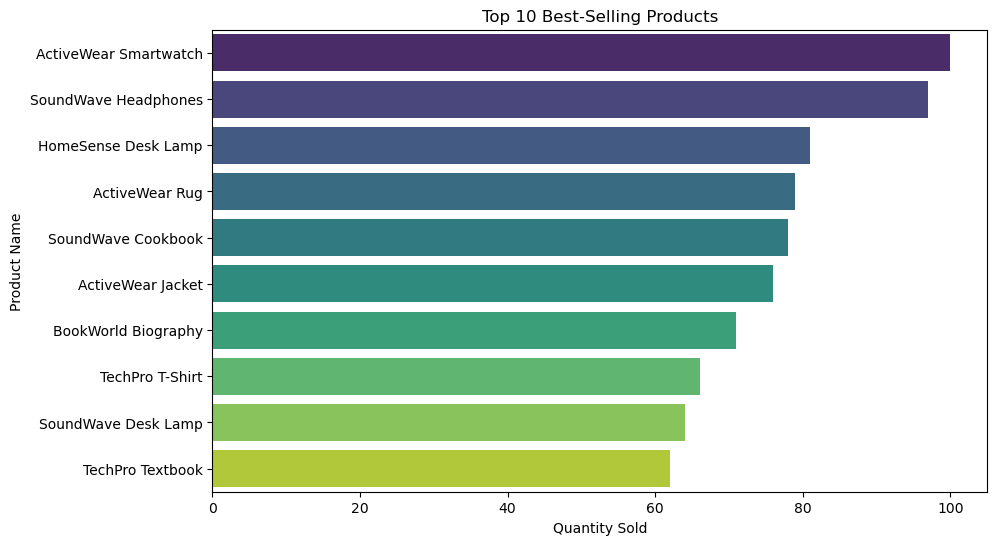

In [10]:
# Top-selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 best-selling products:")
print(top_products)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis', legend=False)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

Top products by region:
           Region            ProductName  Quantity
0            Asia      HomeSense T-Shirt        28
1            Asia      ActiveWear Jacket        23
2            Asia    HomeSense Desk Lamp        21
3          Europe         ActiveWear Rug        30
4          Europe   SoundWave Headphones        27
5          Europe     SoundWave Cookbook        24
6   North America   SoundWave Headphones        37
7   North America    BookWorld Biography        25
8   North America  ActiveWear Smartwatch        24
9   South America  ActiveWear Smartwatch        38
10  South America    ActiveWear Textbook        38
11  South America    HomeSense Desk Lamp        29


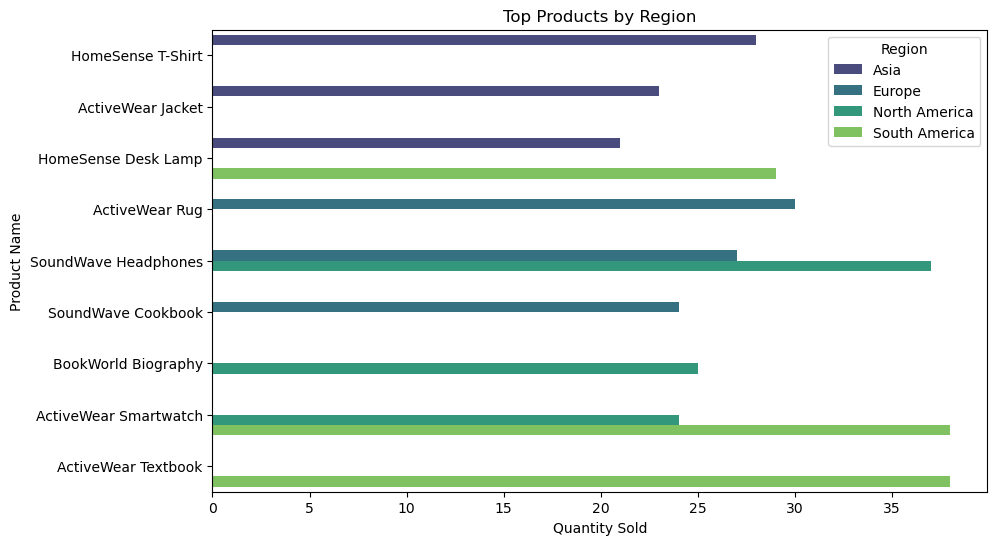

In [11]:
# Product popularity by region
product_region_popularity = merged_data.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()

# Sort by Region and Quantity to get the top 3 products for each region
top_region_products = product_region_popularity.sort_values(['Region', 'Quantity'], ascending=[True, False]) \
                                              .groupby('Region').head(3).reset_index(drop=True)

print("Top products by region:")
print(top_region_products)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_region_products, x='Quantity', y='ProductName', hue='Region', palette='viridis')
plt.title("Top Products by Region")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

Monthly transaction counts:
TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


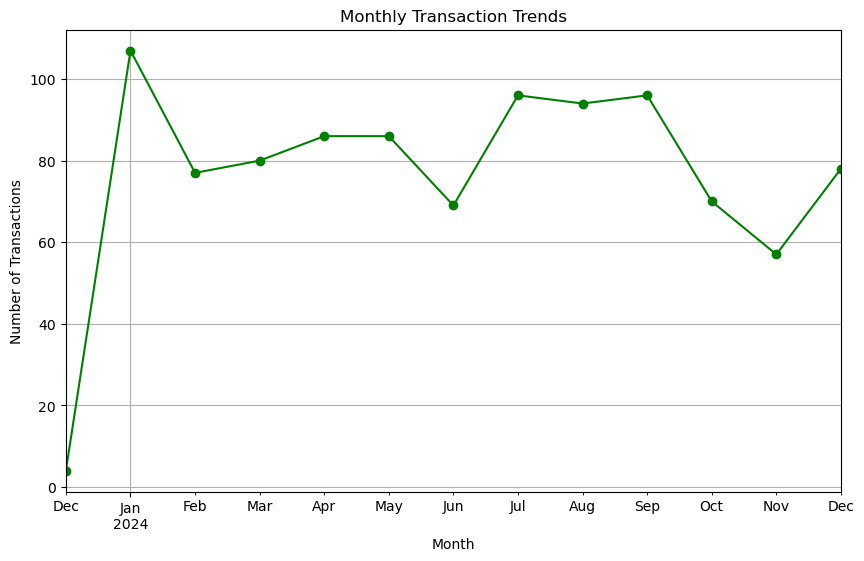

In [12]:
# Monthly transaction trends
monthly_transactions = merged_data['TransactionDate'].dt.to_period('M').value_counts().sort_index()
print("Monthly transaction counts:")
print(monthly_transactions)

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='green')
plt.title("Monthly Transaction Trends")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.grid(True)
plt.show()